<a href="https://colab.research.google.com/github/ambreenraheem/Deep-Learning/blob/main/DEEPLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ambreen Abdul Raheem
# Microsoft Power BI Data Analyst (Upwork Freelancer)
# Deep Learning / Master Neural Networks & AI Fundamentals
Date: 2-July-2025
# Email:ambreen.upwork.27@gmail.com
# GitHub:https://github.com/ambreenraheem

#### First nueral Network
## simple (ANN) Neural Network in Python using TensorFlow

1# install Tensorflow

In [74]:
!pip install tensorflow

In [75]:
!pip install keras

In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

2 # Import Dataset

In [77]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')

# Load Dataset from seaborn
penguins = sns.load_dataset("penguins")

**ABOUT DATA OF PENGUINS\
We're going to practice some Exploratry Data Analysis and Data Wrangling in python using data for penguin sizes recorded by Dr. Kristen Gorman and colleagues with the Palmer Station Long Term Ecological Research site (Palmer LTER) at several islands in the Palmer Archipelago, Antarctica. Data are originally published in: Gorman KB, Williams TD, Fraser WR (2014) PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081, and made available through the Environmental Data Initiative.**

**bill_length_mm: This column contains measurements of the bill length of penguins in millimeters. Here are some key statistics:\
Mean: The average bill length is approximately 43.92 mm.\
Standard Deviation (std): The variation in bill length around the mean is approximately 5.46 mm.\
Minimum: The smallest recorded bill length is 32.1 mm.\
25th Percentile (25%): 25% of the data falls below a bill length of 39.23 mm.\
Median (50%): The middle value (50th percentile) is approximately 44.45 mm.
75th Percentile (75%): 75% of the data falls below a bill length of 48.5 mm.\
Maximum: The largest recorded bill length is 59.6 mm.\
bill_depth_mm: This column represents the bill depth (width) of penguins in millimeters. The statistics follow a similar pattern as above.\
flipper_length_mm: The flipper length refers to the length of a penguin’s flipper (wing) in millimeters. Key statistics include the mean, standard deviation, minimum, maximum, and quartiles.\
body_mass_g: This column provides information about the body mass of penguins in grams. The mean body mass is approximately 4201.75 g, with variations around this value.\
These statistics help us understand the distribution and variability of these penguin features. Keep in mind that these measurements are specific to the dataset you’re analyzing.**

**Put your dataset in an other variable for safe side**

In [78]:
# just for saving it in the case of repeating data
pgs=penguins
pgs.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


3 # Pre-processing of Data

In [79]:
penguins.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [80]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


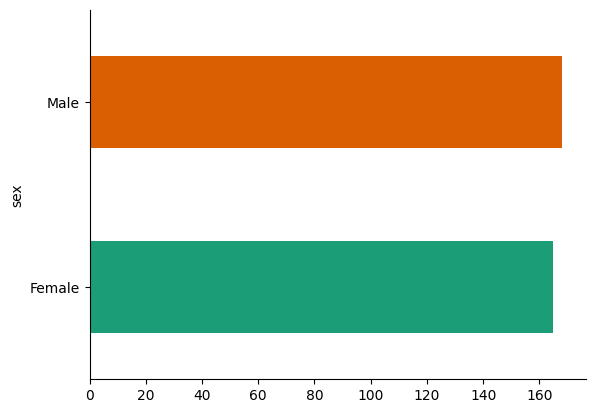

In [81]:
from matplotlib import pyplot as plt
import seaborn as sns
penguins.groupby('sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [82]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [83]:
penguins.nunique()

,0
species,3
island,3
bill_length_mm,164
bill_depth_mm,80
flipper_length_mm,55
body_mass_g,94
sex,2


In [84]:
penguins.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [85]:
penguins.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [86]:
penguins.sex.value_counts()

,count
sex,
Male,168
Female,165


In [87]:
penguins.species.value_counts()

,count
species,
Adelie,152
Gentoo,124
Chinstrap,68


In [88]:
penguins.groupby(["species","island"]).count()

bill_length_mm  bill_depth_mm  flipper_length_mm  \
species   island                                                        
Adelie    Biscoe                 44             44                 44   
          Dream                  56             56                 56   
          Torgersen              51             51                 51   
Chinstrap Dream                  68             68                 68   
Gentoo    Biscoe                123            123                123   

                     body_mass_g  sex  
species   island                       
Adelie    Biscoe              44   44  
          Dream               56   55  
          Torgersen           51   47  
Chinstrap Dream               68   68  
Gentoo    Biscoe             123  119

In [89]:
penguins.isnull().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


In [90]:
# Filling NaN rows values with ffill (forwardfill) value or bfill (backwardfill) value.
penguins['bill_length_mm'].fillna(method='ffill', inplace=True)
penguins['bill_depth_mm'].fillna(method='ffill', inplace=True)
penguins['flipper_length_mm'].fillna(method='ffill', inplace=True)
penguins['body_mass_g'].fillna(method='ffill', inplace=True)

In [91]:
penguins.isnull().sum()

,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,11


In [92]:
penguins['sex'].fillna(0, inplace=True)

In [93]:
penguins['sex'].value_counts()

,count
sex,
Male,168
Female,165
0,11


DO NOT RUN THIS CELL AGAIN AND AGAIN WHEN IT WORKS ON FIRST TIME

In [100]:
# Convert the 'sex' column back to object type before applying get_dummies
penguins['sex'] = penguins['sex'].astype(object)

# Converting categorical variables to dummy variables
penguins = pd.get_dummies(penguins, columns=['sex'], drop_first=True)

In [101]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex_Female         344 non-null    bool   
 7   sex_Male           344 non-null    bool   
dtypes: bool(2), float64(4), object(2)
memory usage: 16.9+ KB


In [102]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_Female,sex_Male
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,False,True
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,True,False
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,True,False
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,False,False
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,True,False
...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,False,False
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,True,False
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,False,True
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,True,False


4 # Select Features and Targets\
X and y

In [105]:
# Selecting features (X) and targets (y)
# We will use the numerical features and the one-hot encoded 'species' column as features
X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
# We will use the 'sex' column as the target variable
y = penguins['sex_Male'] # Using 'sex_Male' for binary classification (1 for Male, 0 otherwise)

display(X.head())
display(y[:5])

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0


,sex_Male
0,True
1,False
2,False
3,False
4,False


5# Splitting the Data:\
Divide the data into two set: One for training the neural network (training set) and the other for testing its performance (test set).

In [106]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (275, 4)
Shape of X_test: (69, 4)
Shape of y_train: (275,)
Shape of y_test: (69,)


6# Standardizing the Data:\
Scale the feature data so that they have a mean of 0 and a standard deviation of 1. This standardinzation process helps in speeding up the training process and improving performance. You may also use Min-Max scalar.

In [107]:
# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train[:5])

[[-1.5190407  -0.42893207 -0.43622341 -1.06617792]
 [ 0.53662231 -0.83185717  0.96601431  1.17697613]
 [-0.8459475   1.28349956 -0.43622341  0.5850327 ]
 [-0.66403042  0.02435865 -0.57644718 -1.00386808]
 [ 0.9550316  -1.03331971  1.87746883  1.61314498]]


7# Building the Neural Network Model:
- Define the Model type:
  - Use a Sequential model, which is a linear stack of layers.
- Add Layers:
  - Add one hidden layer with 10 neurons, and use the "ReLU" activation function for non-linear processing. Then, add an output layer with 1 neuron, using the "Sigmoid" activation function, suitable for binary classification.

In [108]:
# Building the model
input_layer=tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)) # input layer
output_layer= tf.keras.layers.Dense(1, activation='sigmoid') # output layer, sigmoid for binary classification
model=tf.keras.Sequential([input_layer, output_layer])

In [109]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61 (244.00 B)

 Trainable params: 61 (244.00 B)

 Non-trainable params: 0 (0.00 B)

In [124]:
# # Building the Neural Network Model
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input(shape=(X_train.shape[1],)), # Input layer
#     tf.keras.layers.Dense(10, activation='relu'), # Hidden layer with 10 neurons and ReLU activation
#     tf.keras.layers.Dense(len(unique_species), activation='softmax') # Output layer with softmax for multi-class classification
# ])

# model.summary()

8# Compile the Model:\
Prepare the model for training by setting the optimizer (here, 'adam', a popular choice), the loss function ('binary-crossentropy', used for binary classification tasks), and the metric to evaluate ('accuracy').

In [110]:
# Compile the Model
model.compile(optimizer='adam',
              loss='binary_crossentropy', # Use binary_crossentropy for binary classification
              metrics=['accuracy'])

9# Training the Data:\
Train the model using training data. We specify the number of epochs (itrations over the entire dataset) and the batch size (number of samples per gradient update).

In [113]:
%%time
# Training the Model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2,verbose=1)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.9134 - loss: 0.2166 - val_accuracy: 0.8364 - val_loss: 0.2970
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9066 - loss: 0.2399 - val_accuracy: 0.8364 - val_loss: 0.2969
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9002 - loss: 0.2425 - val_accuracy: 0.8364 - val_loss: 0.2964
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9070 - loss: 0.2494 - val_accuracy: 0.8364 - val_loss: 0.2962
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9088 - loss: 0.2188 - val_accuracy: 0.8364 - val_loss: 0.2957
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9258 - loss: 0.2108 - val_accuracy: 0.8364 - val_loss: 0.2952
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9079 - loss: 0.2056 - val_accuracy: 0.8364 - val_loss: 0.2952
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9131 - loss: 0.2144 - val_accuracy: 0.8364 - val_loss: 0.2950


10# Evalueating the Model:\
Finally assess the performance of the model on the test data to see how well it learned to predict the target variable.

In [114]:
# Evalueting the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8383 - loss: 0.3744
Test Loss: 0.35614070296287537
Test Accuracy: 0.8405796885490417


In [118]:
# # predict
predictions=model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [123]:
# Convert probabilities to binary predictions (0 or 1)
predicted_sex_binary = (predictions > 0.5).astype(int)

# Map binary predictions back to 'Male' and 'Female' labels
predicted_sex_labels = np.where(predicted_sex_binary == 1, 'Male', 'Female')

# Display the first few predicted sex labels
print("Predicted Sex Labels:")
display(predicted_sex_labels[:10])

# You can also compare these to the actual test set labels (y_test)
# Note: y_test is currently 0 for Female and 1 for Male
print("\nActual Sex Labels (0: Female, 1: Male):")
display(y_test[:10])

Predicted Sex Labels:


array([['Male'],
       ['Male'],
       ['Female'],
       ['Female'],
       ['Female'],
       ['Male'],
       ['Male'],
       ['Female'],
       ['Male'],
       ['Female']], dtype='<U6')


Actual Sex Labels (0: Female, 1: Male):


,sex_Male
194,True
157,False
225,False
208,False
318,False
329,True
319,True
260,False
114,False
220,False


In [121]:
penguins['sex_Male']

,sex_Male
0,True
1,False
2,False
3,False
4,False
...,...
339,False
340,False
341,True
342,False


The keras.Sequential model is very flexible and can be used for both multi-class and binary classification. When you changed the target to 'sex' for binary classification, the key adjustments were made in two places:

The Output Layer: For binary classification, the output layer has a single neuron with a sigmoid activation function. The sigmoid function outputs a value between 0 and 1, which can be interpreted as the probability of the input belonging to the positive class (in this case, 'Male').
The Loss Function: When compiling the model, we changed the loss function to binary_crossentropy. This loss function is specifically designed for binary classification problems and measures how well the model's predicted probabilities match the actual binary labels (0 or 1).
So, even though you are using a Sequential model, by configuring the output layer with a sigmoid activation and using binary crossentropy loss, you correctly set it up for your binary classification task of predicting penguin sex.

Based on the test accuracy of approximately 84% from the evaluation step, the model seems to be performing reasonably well at predicting the sex of the penguins using the given features.

However, for binary classification, it's also good to look at other metrics like precision, recall, F1-score, and the AUC score (which we generated in the evaluation cell) to get a more complete picture of the model's performance, especially if there's an imbalance in the number of male and female penguins in the dataset.